In [17]:
import sys
import os
import json
import glob

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

import hipy.pltext       as pltext
import matplotlib.pyplot as plt
import awkward           as ak
import numpy             as np

from src.read_data import load_concatenated, read_parquet
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

pltext.style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
run  = 1724
data = load_concatenated(outdir=f"/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/tmp_parquet/{run}")

In [43]:
run_cards, run_times, run_events, run_charges = read_parquet(data, mask=True)
ravel_run_cards, ravel_run_times, ravel_run_events, ravel_run_charges = ak.ravel(run_cards), ak.ravel(run_times), ak.ravel(run_events), ak.ravel(run_charges)

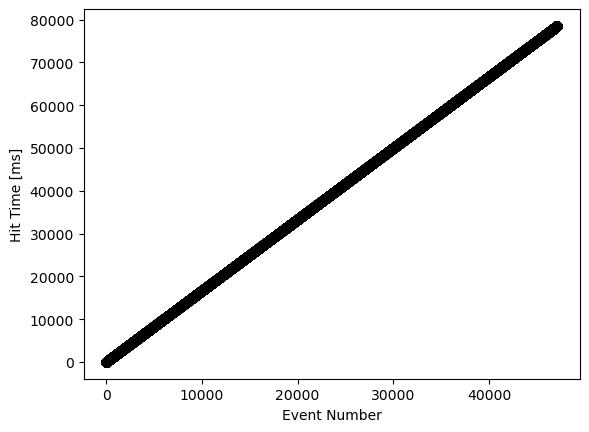

In [44]:
plt.scatter(ravel_run_events[::100], ravel_run_times[::100]/1e6);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [ms]");

In [45]:
cards = np.unique(ravel_run_cards)

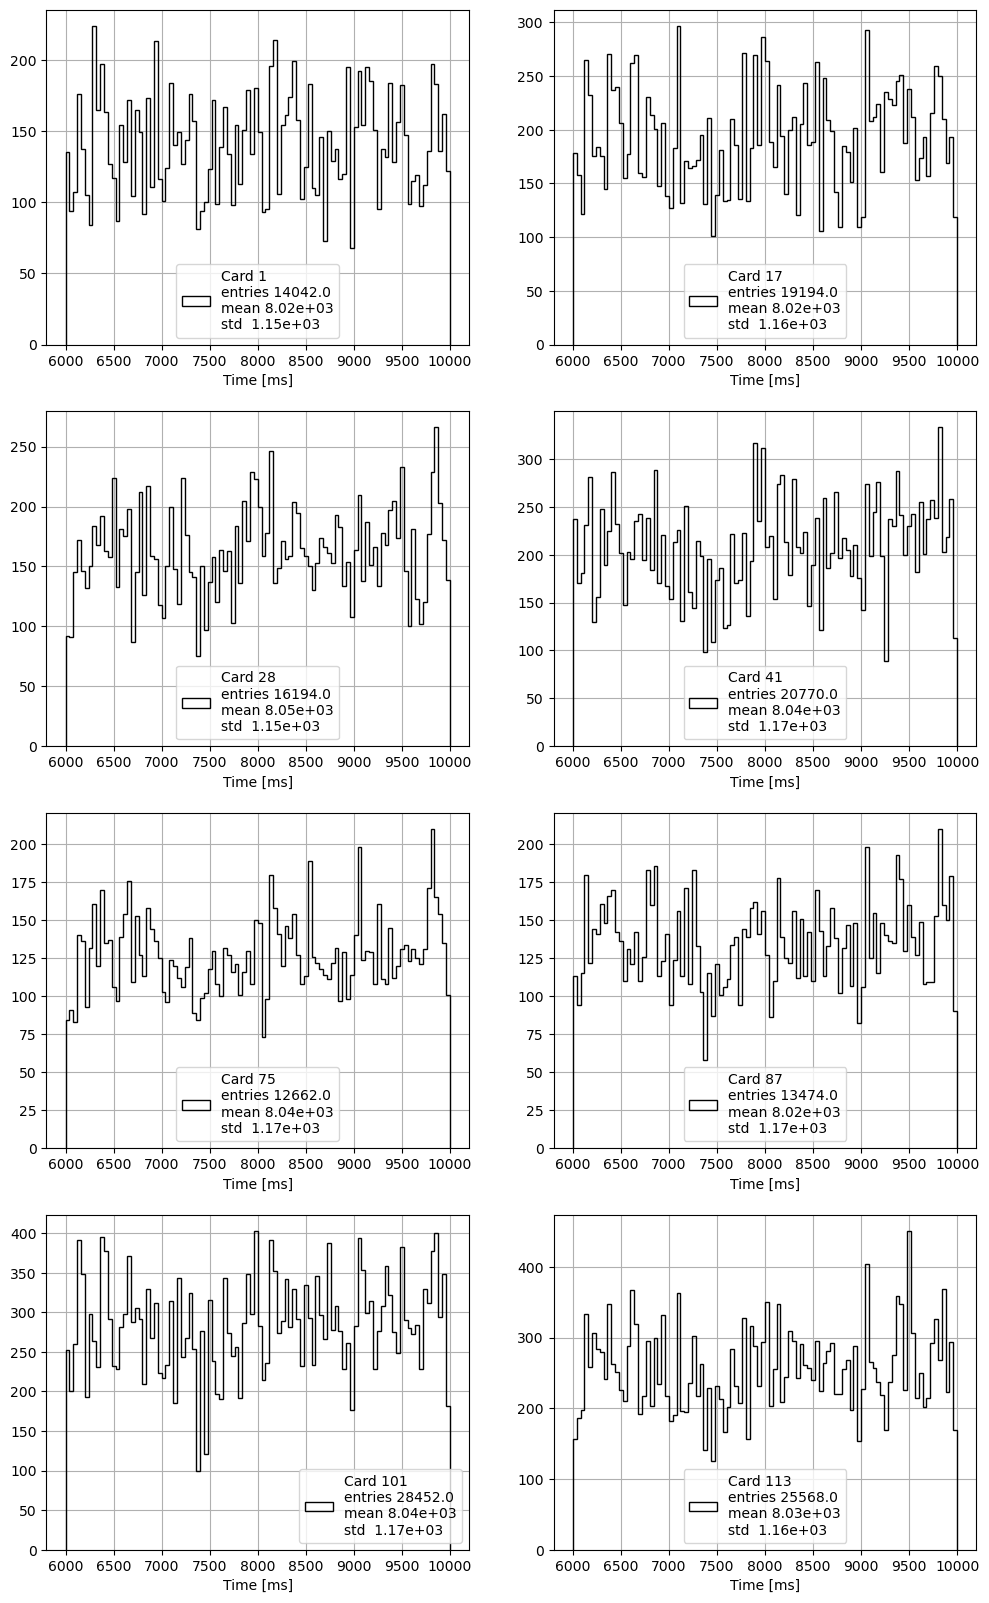

In [46]:
subplot = pltext.canvas(8)

for i, card in enumerate(cards[::11]):
    mask = (ravel_run_cards == card)
    card_hit_times = ravel_run_times[mask]

    subplot(i+1)
    pltext.hist(card_hit_times/1e6, 100, xylabels=("Time [ms]"), formate=".2e", label=f"Card {card}", range=(6000,10000));

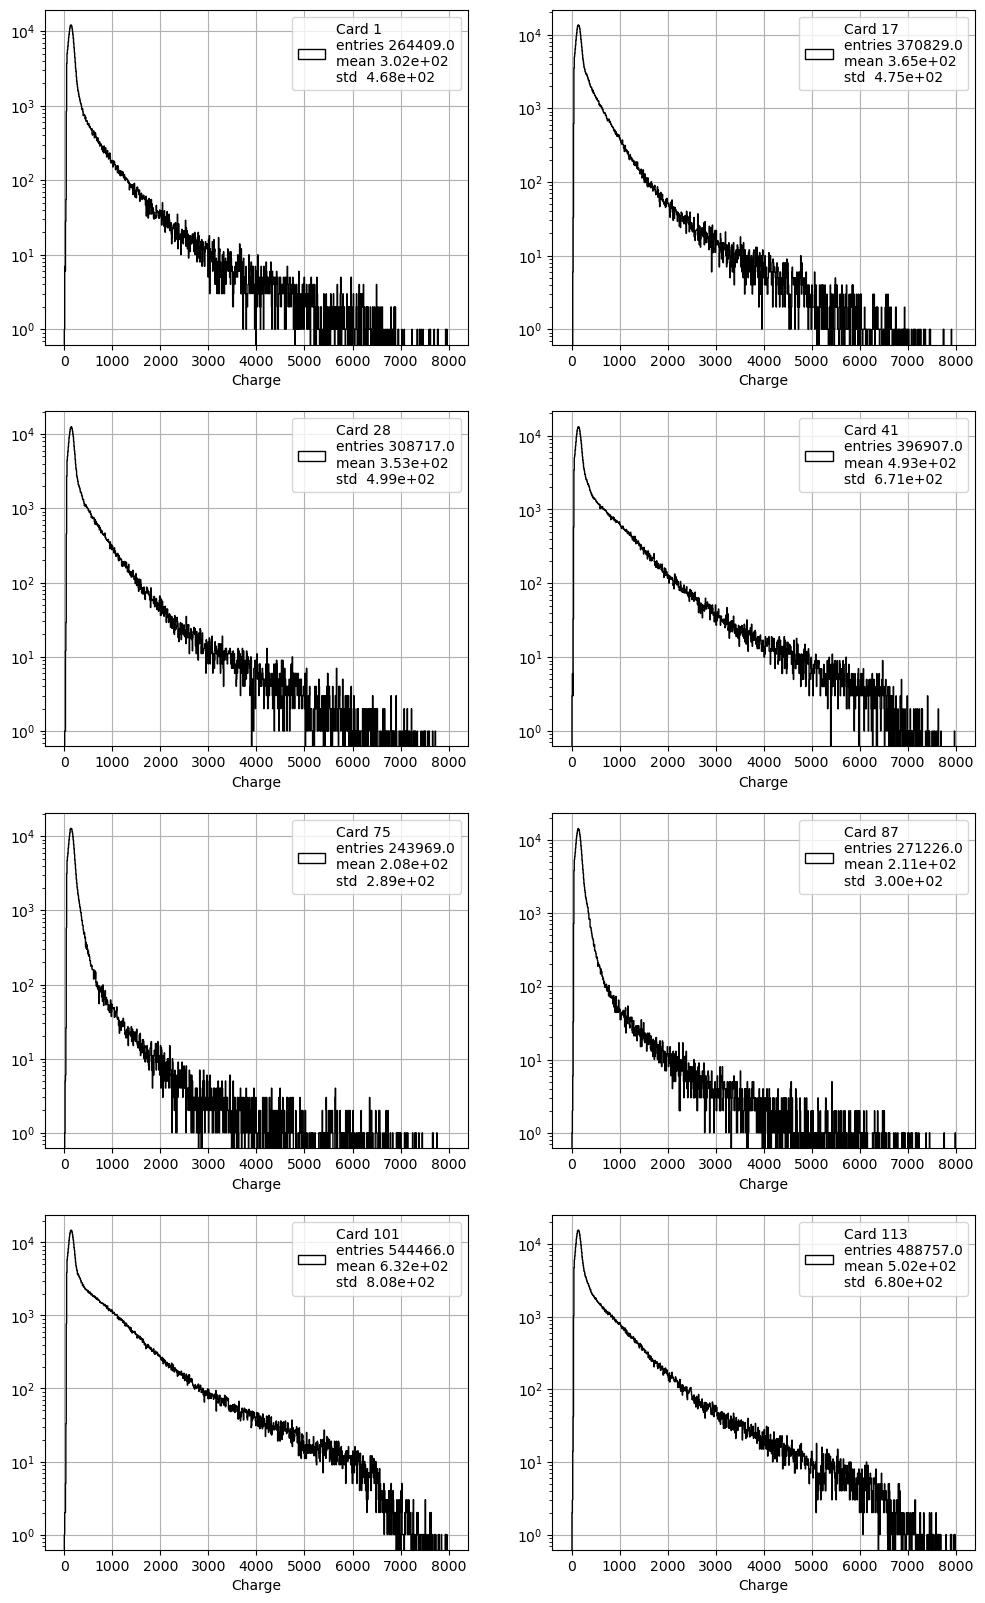

In [47]:
subplot = pltext.canvas(8)

for i, card in enumerate(cards[::11]):
    mask = (ravel_run_cards == card)
    card_hit_charges = ravel_run_charges[mask]

    subplot(i+1)
    pltext.hist(card_hit_charges, 1000, xylabels=("Charge"), formate=".2e", ylog=True, label=f"Card {card}", range=(0, 8e3))

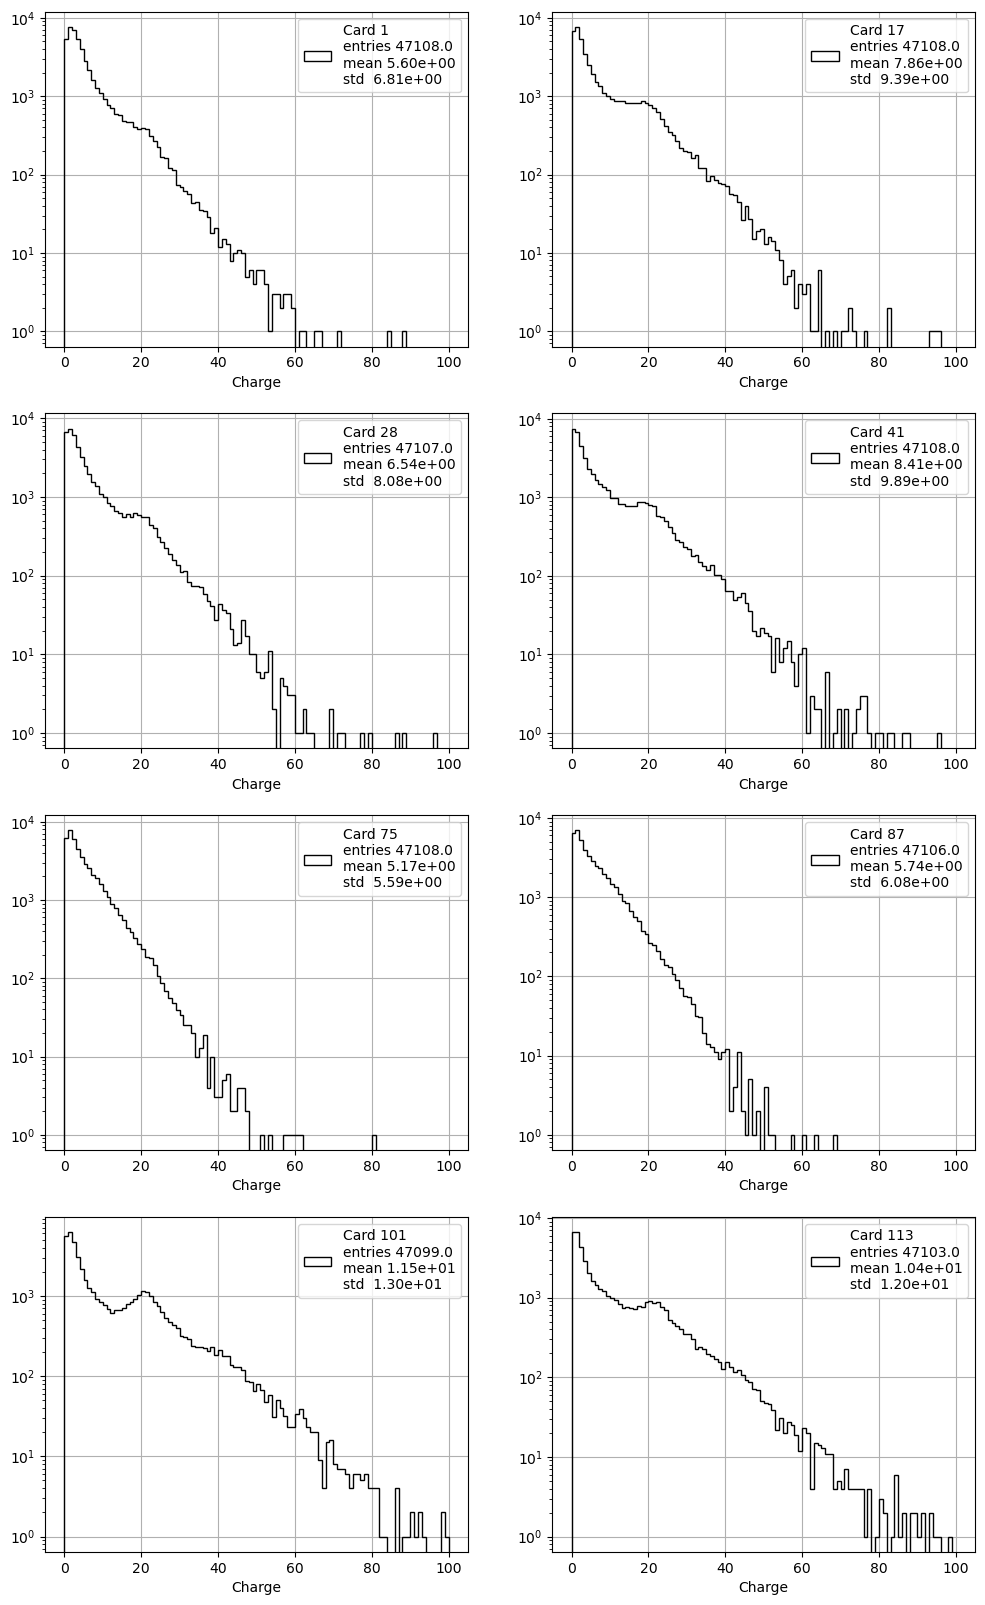

In [84]:
subplot = pltext.canvas(8)

for i, card in enumerate(cards[::11]):
    mask = (run_cards == card)
    card_hit_charges = ak.num(run_events[mask])

    subplot(i+1)
    pltext.hist(card_hit_charges, 100, xylabels=("Charge"), formate=".2e", ylog=True, label=f"Card {card}", range=(0, 100))

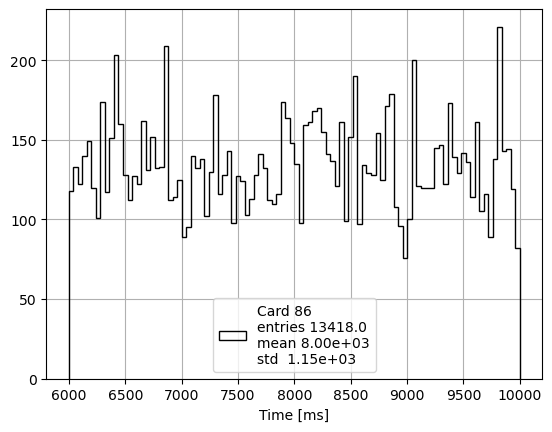

In [48]:
card = 86
mask = (ravel_run_cards == card)
card_hit_times = ravel_run_times[mask]

pltext.hist(card_hit_times/1e6, 100, xylabels=("Time [ms]"), formate=".2e", label=f"Card {card}", range=(6000,10000));

# Per Event Analysis

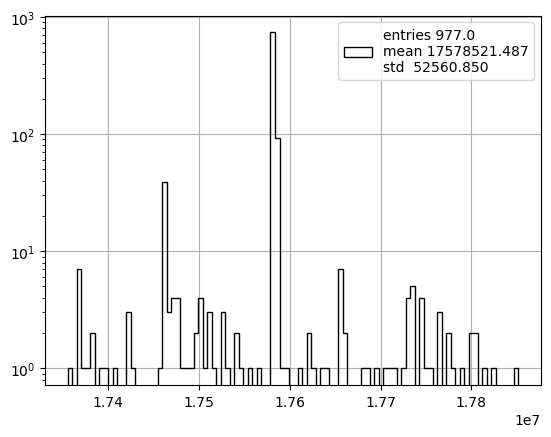

In [51]:
event = 3
pltext.hist(run_times[event], 100, ylog=True);

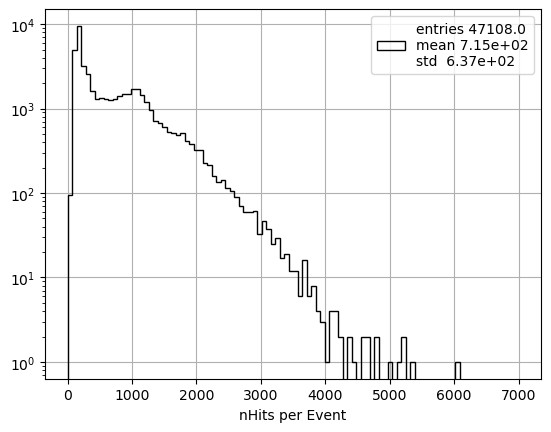

In [67]:
nHits_per_event = ak.num(run_events)
pltext.hist(nHits_per_event, 100, ylog=True, xylabels=("nHits per Event"), formate=".2e", range=(0, 7e3));

In [58]:
charge_per_event = ak.sum(run_charges, axis=-1)

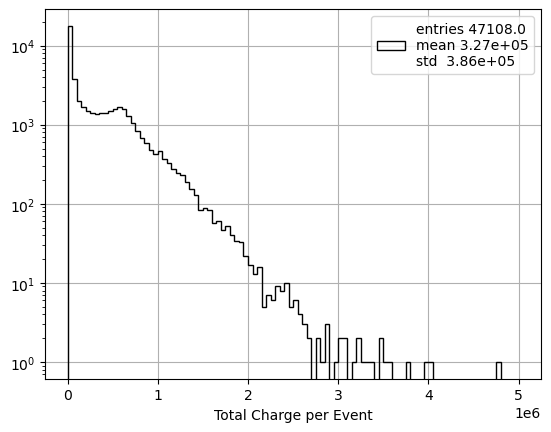

In [64]:
pltext.hist(charge_per_event, 100, ylog=True, xylabels=("Total Charge per Event"), formate=".2e", range=(0, 0.5e7));

In [31]:
hit_time_per_event = ak.mean(run_times, axis=-1)

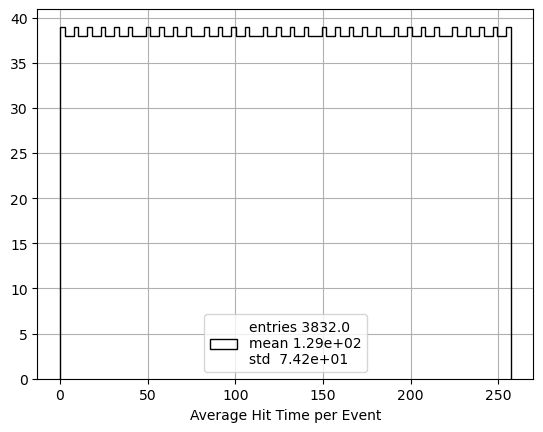

In [36]:
pltext.hist(hit_time_per_event/1e9, 100, xylabels=("Average Hit Time per Event"), formate=".2e");